## Vth - Temperature test 

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np

C:\Users\desi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\desi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
col_L = "#A1A9D0"
col_R = "#B883D4"
col_diff = "#F0988C"

In [3]:
import sys
sys.path.append('..') 

from utils import calculate_vth   

In [4]:
# accessing the folder with the data we want to analyze
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab")

In [5]:
# if you want to order based on the temperature
df_t = {}
temp = ['25','27','29','30','31','33','35','37','40']
for t in temp: df_t[t] = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls') and t in excelfile]

WARNING *** file size (44270) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44326) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44306) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44322) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44278) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44262) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

In [12]:
# if you want the data in the acquisition order
order = ['25','27','29','31','33','35','37','40','35','30','25','30','35','40','35','30','25']
file_names = os.listdir(os.getcwd())

file_info = [(file_name, os.path.getmtime(os.path.join(os.getcwd(), file_name))) for file_name in file_names]

sorted_files = [file_name for file_name, _ in sorted(file_info, key=lambda x: x[1])]
df_t_order = [pd.read_excel(excelfile) for excelfile in sorted_files if excelfile.endswith('.xls')]

WARNING *** file size (44326) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44306) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44322) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44268) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44300) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44318) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44330) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

In [14]:
# example
# calculating thr vth for the right transistor of the first data acquired (in the case @ 25C)
calculate_vth(df_t_order[0]['DrainVRight'],df_t_order[0]['DrainI'])

0.4175114631652832

In [15]:
df_t_order[0]

,Time,DrainI,DrainVLeft,GateI,DrainVRight
0,0.032339,0.000000e+00,0.014961,0.000000e+00,0.417511
1,0.064883,1.000000e-08,0.334888,1.000000e-08,0.636326
2,0.097942,2.000000e-08,0.840968,2.000000e-08,0.780089
3,0.131019,3.000000e-08,0.991979,3.000000e-08,0.865429
4,0.164099,4.000000e-08,1.060635,4.000000e-08,0.932624
...,...,...,...,...,...
96,3.207076,9.600000e-07,2.991251,9.600000e-07,2.855074
97,3.240124,9.700000e-07,3.006132,9.700000e-07,2.870059
98,3.273153,9.800000e-07,3.020618,9.800000e-07,2.884565
99,3.306206,9.900000e-07,3.034963,9.900000e-07,2.899092


Text(0, 0.5, 'Vth [V]')

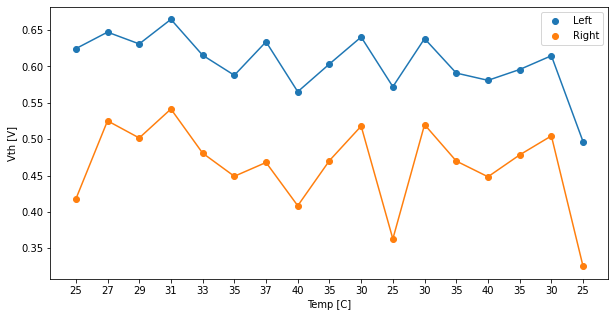

In [16]:
Vth_t_ord = []

Vth_t_ord = [[calculate_vth(k['DrainVLeft'],k['DrainI']),calculate_vth(k['DrainVRight'],k['DrainI'])] for k in df_t_order]
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.xticks(range(len(order)), order)
plt.scatter(range(len(order)), [i[0] for i in Vth_t_ord], label='Left')
plt.plot(range(len(order)),[i[0] for i in Vth_t_ord] )
plt.scatter(range(len(order)), [i[1] for i in Vth_t_ord], label='Right')
plt.plot(range(len(order)),[i[1] for i in Vth_t_ord] )

plt.legend()

plt.xlabel('Temp [C]')
plt.ylabel('Vth [V]') 

Text(0, 0.5, 'Vth [V]')

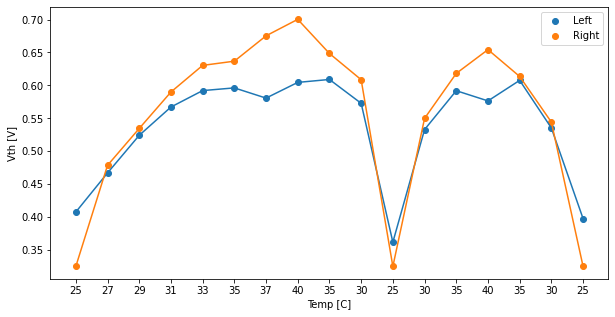

In [ ]:
Vth_t_ord = []

Vth_t_ord = [[calculate_vth(k['DrainVLeft'],k['DrainI']),calculate_vth(k['DrainVRight'],k['DrainI'])] for k in df_t_order]
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.xticks(range(len(order)), order)
plt.scatter(range(len(order)), [i[0] for i in Vth_t_ord], label='Left')
plt.plot(range(len(order)),[i[0] for i in Vth_t_ord] )
plt.scatter(range(len(order)), [i[1] for i in Vth_t_ord], label='Right')
plt.plot(range(len(order)),[i[1] for i in Vth_t_ord] )

plt.legend()

plt.xlabel('Temp [C]')
plt.ylabel('Vth [V]') 

### Vth - strain test

In [17]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\okdevice") # path where the data are stored
path =  os.getcwd()

df = {}
strain = ['0','25','50','75','100']
for st in strain: df[st] = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls')]


WARNING *** file size (44291) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44301) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44291) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44303) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44307) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44293) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44301) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

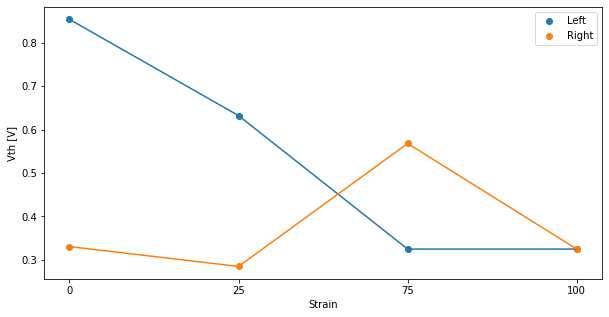

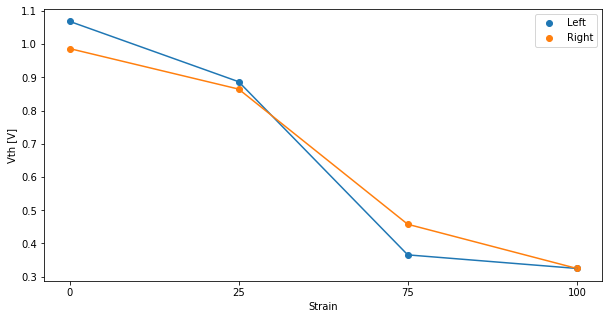

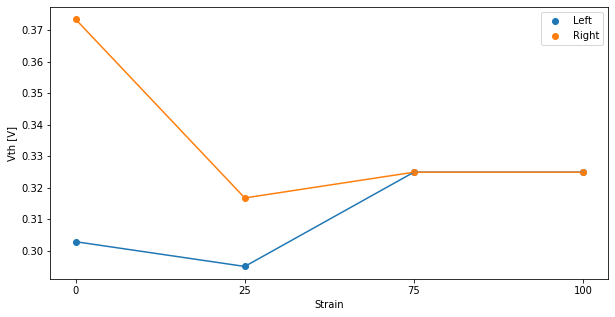

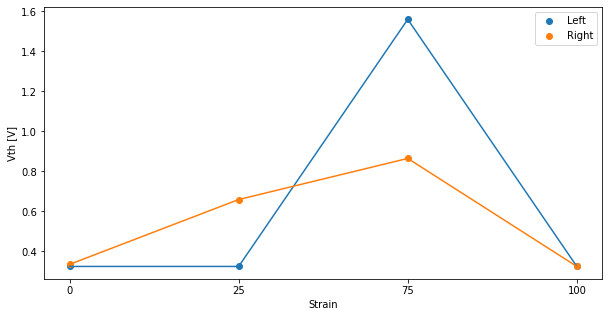

In [ ]:
Vth_row2_strain = []
strain = ['0','25','75','100']
for row in ['1','2','3','4']:
    Vth_t_ord = [[np.mean([calculate_vth(i['DrainVLeft'],df_r['2']['0'][0]['DrainI']) for i in df_r[row][k]],axis = 0),[np.mean([calculate_vth(i['DrainVRight'],df_r['2']['0'][0]['DrainI']) for i in df_r[row][k]],axis = 0)]] for k in strain]
    fig, ax1 = plt.subplots(figsize=(10, 5))
    plt.scatter(strain, [i[0] for i in Vth_t_ord], label='Left')
    plt.plot(strain,[i[0] for i in Vth_t_ord] )
    plt.scatter(strain, [i[1] for i in Vth_t_ord], label='Right')
    plt.plot(strain,[i[1] for i in Vth_t_ord] )

    plt.legend()

    plt.xlabel('Strain')
    plt.ylabel('Vth [V]') 

In [ ]:
# saving data in xlsx
data = [order, [i[0] for i in Vth_t_ord], [i[1] for i in Vth_t_ord]]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Temperature [C]', 1: 'Vth Left [V]', 2: 'Vth Right [V]'}).set_index('Temperature [C]')
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_Vth_temperature.xlsx')

Vth for the strecthing test

In [ ]:
Stretch_vth = pd.read_excel(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\d052223-r2c2-I-V curves.xlsx")
Stretch_vth

,DrainI,DrainI-uA,DrainV-0%,GateV-0%,DIFF-0%,DrainV-25%,GateV-25%,DIFF-25%,DrainV-50%,GateV-50%,DIFF-50%,DrainV-100%,GateV-100%,DIFF-100%
0,0.000000e+00,0.00,0.00146,0.31806,0.31660,0.000369,0.42674,0.42637,0.000872,0.45624,0.45537,0.00698,0.81163,0.80466
1,1.000000e-08,0.01,0.68637,0.67633,0.01004,0.563510,0.67074,0.10722,0.583630,0.71513,0.13149,0.68473,1.32896,0.64422
2,2.000000e-08,0.02,0.93708,0.81784,0.11924,0.812180,0.79508,0.01710,0.879600,0.85566,0.02394,1.46561,1.67260,0.20699
3,3.000000e-08,0.03,1.00253,0.90537,0.09716,0.921780,0.89502,0.02676,1.013600,0.96315,0.05045,1.70429,1.89560,0.19131
4,4.000000e-08,0.04,1.07225,0.98396,0.08829,0.999310,0.97648,0.02284,1.101130,1.05205,0.04908,1.96669,2.13536,0.16867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9.600000e-07,0.96,3.48922,3.33915,0.15007,4.067080,4.13712,0.07004,6.849260,6.78179,0.06747,18.68621,16.77653,1.90968
97,9.700000e-07,0.97,3.50918,3.35533,0.15384,4.095660,4.16490,0.06924,6.911840,6.83789,0.07395,18.81503,16.92863,1.88640
98,9.800000e-07,0.98,3.52908,3.37611,0.15296,4.123380,4.19294,0.06956,6.973600,6.89200,0.08160,18.98210,17.06158,1.92052
99,9.900000e-07,0.99,3.54873,3.39393,0.15480,4.149630,4.22242,0.07279,7.030920,6.93850,0.09242,19.15909,17.18886,1.97024


Text(0, 0.5, 'Vth [V]')

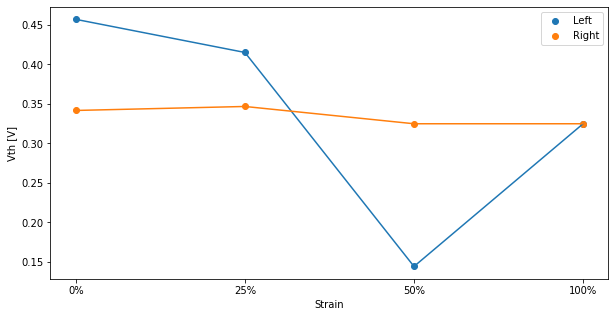

In [ ]:
Vth_stretch_ord = []
stretch = ['0%', '25%', '50%', '100%']
Vth_stretch_ord = [[calculate_vth(Stretch_vth['DrainV-'+k],Stretch_vth['DrainI']),calculate_vth(Stretch_vth['GateV-'+k],Stretch_vth['DrainI'])] for k in stretch]
    
fig, ax1 = plt.subplots(figsize=(10, 5))

plt.scatter(stretch, [i[0] for i in Vth_stretch_ord], label='Left')
plt.plot(stretch,[i[0] for i in Vth_stretch_ord] )
plt.scatter(stretch, [i[1] for i in Vth_stretch_ord], label='Right')
plt.plot(stretch,[i[1] for i in Vth_stretch_ord] )

plt.legend()

plt.xlabel('Strain')
plt.ylabel('Vth [V]') 